In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def f(x):
    # función 2^cos(x^2)
    return 2**(np.cos(x**2))

def h(x_i, theta):
    y_hat = 0
    for i in range(len(theta)):
        y_hat += theta[i]*(x_i**i)
    return y_hat

def h_vec(x, theta):
    # Convertir a array de NumPy para operaciones vectorizadas
    x = np.array(x)
    theta = np.array(theta)
    result = np.zeros_like(x)
    for i in range(len(theta)):
        result += theta[i] * (x**i)
    return result

def loss(y, y_hat):
    return (y - y_hat)**2

def cost(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    m = len(y)
    return (1/m) * np.sum(loss(y, y_hat))

def split_batch(X, y, batch_size):
    X = np.array(X)
    y = np.array(y)
    X_batches = []
    y_batches = []
    for i in range(0, len(y), batch_size):
        X_batches.append(X[i:i+batch_size])
        y_batches.append(y[i:i+batch_size])
    return X_batches, y_batches

def grad(X, y, theta):
    X = np.array(X)
    y = np.array(y)
    theta = np.array(theta)
    m = len(y)
    y_hat = h_vec(X, theta)
    gradient = np.zeros(len(theta))
    for j in range(len(theta)):
        gradient[j] = (-2/m) * np.sum((y - y_hat) * (X**j))
    return gradient

In [44]:
def adam(X, y, theta, alpha=0.01, beta1 = 0.9, beta2=0.999, batch_size=50, epochs=1000, tol=1e-5):
    X = np.array(X)
    y = np.array(y)
    theta = np.array(theta)
    cost_history = []
    V = np.zeros(len(theta))
    S = np.zeros(len(theta))
    for epoch in range(epochs):
        # Split data into batches
        X_batches, y_batches = split_batch(X, y, batch_size)

        # Calculate cost of current theta
        cost_i = cost(y, h_vec(X, theta))
        cost_history.append(cost_i)
        # Print cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost_i}")

        # Stop criteria
        if np.linalg.norm(grad(X, y, theta)) <= tol:
            print(f"Converged at epoch {epoch}")
            break
        
        # Step per batch
        for X_batch, y_batch in zip(X_batches, y_batches):
            V = beta1 * V + (1 - beta1) * grad(X_batch, y_batch, theta)
            S = beta2 * S + (1 - beta2) * (grad(X_batch, y_batch, theta)**2)
            V_new = V / (1 - beta1**(epoch + 1))
            S_new = S / (1 - beta2**(epoch + 1))
            theta -= alpha * (V_new / (np.sqrt(S_new) + 1e-8))

    return theta, cost_history

In [63]:
# Valores de x y f(x)
x = np.linspace(-np.pi, np.pi, 500, endpoint=False)
y = f(x)

# Normalizar x para evitar potencias muy grandes
x_norm = x / np.pi

# Polinomios de grado N
N = 20
theta_0 = np.zeros(N+1)  # Inicialización en cero

# Usar un learning rate más apropiado
theta_optimized, cost_history = adam(x_norm, y, theta_0, alpha=0.05, batch_size=50, epochs=2000)

# Hacer predicciones con x normalizado
y_hat = h_vec(x_norm, theta_optimized)

Epoch 0, Cost: 1.961031434293412
Epoch 100, Cost: 0.21479971781657575
Epoch 200, Cost: 0.16164502367430303
Epoch 300, Cost: 0.12566350863182657
Epoch 400, Cost: 0.10192034752933393
Epoch 500, Cost: 0.0832202181403356
Epoch 600, Cost: 0.06882372882588547
Epoch 700, Cost: 0.05778939215960955
Epoch 800, Cost: 0.04932974958808134
Epoch 900, Cost: 0.04283179717506948
Epoch 1000, Cost: 0.03782529919488333
Epoch 1100, Cost: 0.3862163257151917
Epoch 1200, Cost: 0.03116427447806128
Epoch 1300, Cost: 0.028949203787228244
Epoch 1400, Cost: 0.027191790247493863
Epoch 1500, Cost: 0.025796872165065095
Epoch 1600, Cost: 0.02468849340853209
Epoch 1700, Cost: 0.023797014922883476
Epoch 1800, Cost: 0.023136596847237803
Epoch 1900, Cost: 0.022632287590294262


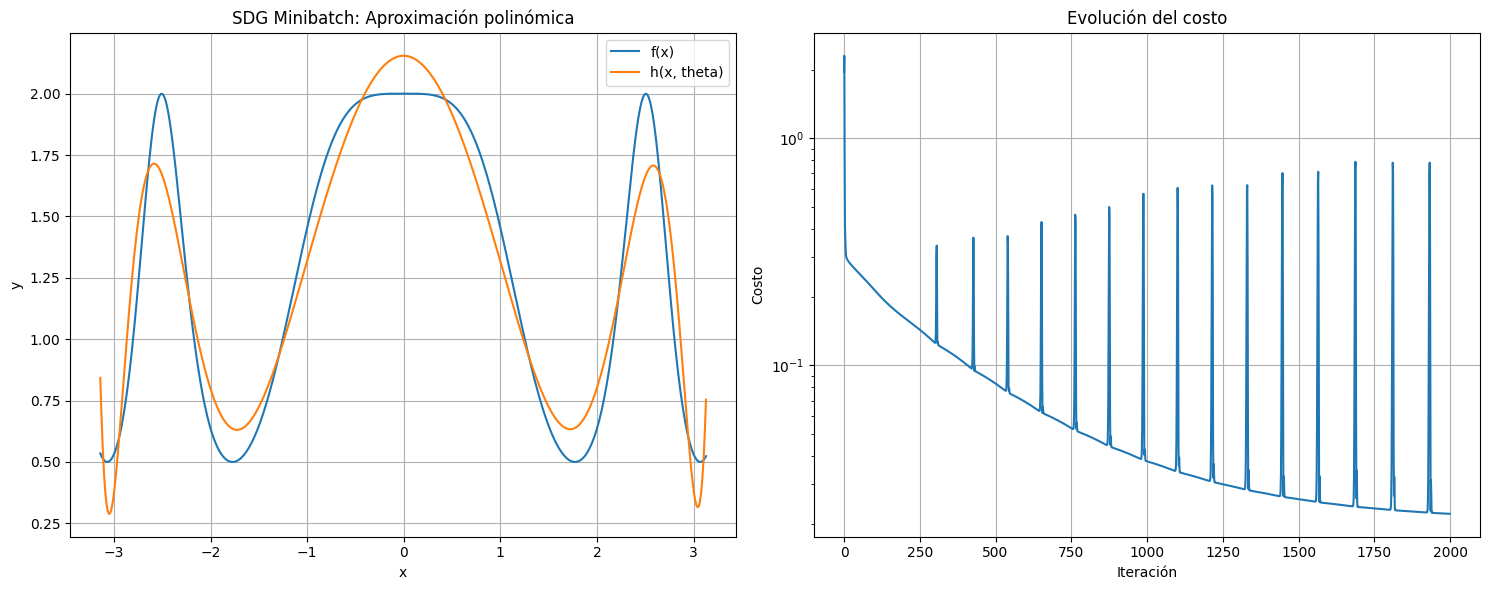

In [64]:
# Crear las dos gráficas solicitadas
plt.figure(figsize=(15, 6))

# Gráfica 1: Función original vs predicción
plt.subplot(1, 2, 1)
plt.plot(x,y, label='f(x)')
plt.plot(x,y_hat, label='h(x, theta)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SDG Minibatch: Aproximación polinómica')
plt.legend()
plt.grid()

# Gráfica 2: Convergencia del costo
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.yscale('log')
plt.title('Evolución del costo')
plt.grid()

plt.tight_layout()
plt.show()